### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sklearn.cross_validation
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
random.seed(3)

x = [x/100 for x in range(1,10001,1)]
b0, b1 = random.random(), random.random()

y = [b0 + b1 * math.log(n) + random.random() for n in x]
data = pd.DataFrame({'y':y, 'x':x})
data.head()

,x,y
0,0.01,-1.898348
1,0.02,-1.287153
2,0.03,-1.044686
3,0.04,-1.448313
4,0.05,-1.379232


In [3]:
data['x2'] = data['x']**2

In [4]:
quadratic = smf.ols(formula = 'y ~ x2', data=data).fit()
y_pred = quadratic.predict(data['x2'])
quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     7873.
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        10:01:25   Log-Likelihood:                -6433.6
No. Observations:               10000   AIC:                         1.287e+04
Df Residuals:                    9998   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2440      0.007    324.862      0.000       2.230       2.258
x2             0.0001   1.54e-06     88.731      0.000       0.000       0.000
==============================================================================
Omnibus:                     3118.065   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15163.649
Skew:                          -1.433   Prob(JB):                         0.00
Kurtosis:                       8.309   Cond. No.                     6.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

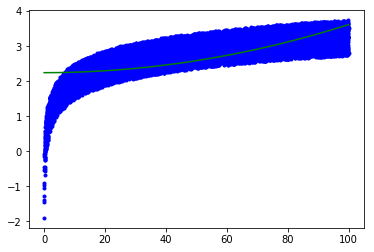

In [5]:
plt.plot(data.x, data.y, 'b.', data.x, y_pred, 'g-')

In [6]:
data['logx'] = data['x'].apply(math.log, 1)


In [7]:
logmodel = smf.ols(formula = 'y~logx', data = data).fit()
y_pred = logmodel.predict(data['logx'])
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 3.558e+04
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        10:01:25   Log-Likelihood:                -1752.6
No. Observations:               10000   AIC:                             3509.
Df Residuals:                    9998   BIC:                             3524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7347      0.011     67.938      0.000       0.714       0.756
logx           0.5453      0.003    188.622      0.000       0.540       0.551
==============================================================================
Omnibus:                     8231.732   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.676
Skew:                           0.021   Prob(JB):                    7.38e-130
Kurtosis:                       1.806   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

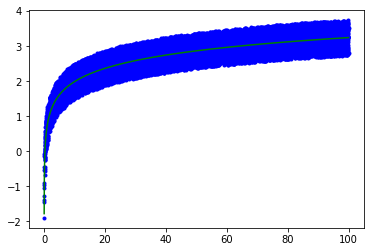

In [8]:
plt.plot(data.x, data.y, 'b.', data.x, y_pred, 'g-')

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [9]:
def mean_square_error(a, b):
    return np.mean([(a-b)**2 for a,b in zip(a,b)])

In [10]:
b2 = random.random()
y = [b0 + b1*n + b2*(n**2) + random.random() for n in x]
data = pd.DataFrame({'y':y, 'x':x})
data['x2'] = data['x']**2

In [11]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(data[['x', 'x2']], data.y, train_size = 0.75)

In [12]:
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.950e+10
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        10:01:26   Log-Likelihood:                -3351.2
No. Observations:                7500   AIC:                             6706.
Df Residuals:                    7498   BIC:                             6720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.5739      0.000   1897.820      0.000       0.573       0.575
x2             0.1840   3.89e-06   4.73e+04      0.000       0.184       0.184
==============================================================================
Omnibus:                      172.393   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.778
Skew:                           0.273   Prob(JB):                     3.65e-32
Kurtosis:                       2.594   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_train_pred = model.predict(x_train)

In [14]:
mean_square_error(y_train_pred, y_train)


0.14309772802020407

In [15]:
y_test_predict = model.predict(x_test)
mean_square_error(y_test_predict, y_test)

0.14486044837424336

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [37]:
def polynomial_fit(df, order):
    columns = []
    
    for n in range(order+1):
        col = 'x'+str(n)
        columns.append(col)
        df[col] = df['x']**n
        
    x = df[columns]
    y = df.y
    
    x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, train_size = 0.75)
    
    model = sm.OLS(y_train, x_train).fit()

    y_train_hat = model.predict(x_train)
    training_error = mean_square_error(y_train, y_train_hat)
    y_test_hat = model.predict(x_test)
    testing_error = mean_square_error(y_test, y_test_hat)
    
    return [training_error, testing_error, model.rsquared, model.aic]

In [38]:
data = pd.DataFrame({'y':y, 'x':x})

In [39]:
orders = range(7)
results = [polynomial_fit(data, n) for n in orders]

In [40]:
train_error = [n[0] for n in results]
test_error = [n[1] for n in results]
r2 = [n[2] for n in results]
aic = [n[3] for n in results]

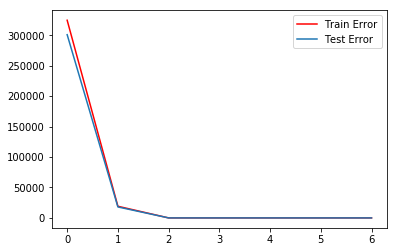

In [41]:
plt.plot(orders, train_error, 'r', label = 'Train Error', )
plt.plot(orders, test_error, '-', label = 'Test Error')
plt.legend()

Text(0,0.5,'R-Squared value')

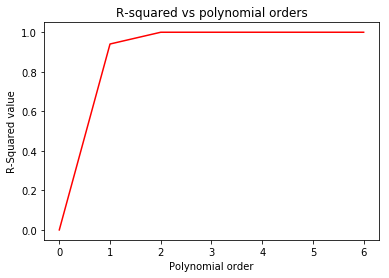

In [42]:
plt.plot(orders, r2, 'r-' )
plt.title('R-squared vs polynomial orders')
plt.xlabel('Polynomial order')
plt.ylabel('R-Squared value')

Text(0,0.5,'AIC')

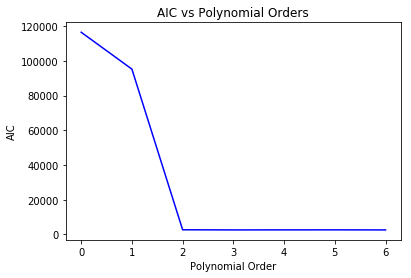

In [43]:
plt.plot(orders, aic, 'b-' )
plt.title('AIC vs Polynomial Orders')
plt.xlabel('Polynomial Order')
plt.ylabel('AIC')

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.


In [44]:
def regression_error(df, m):
    df = df[:m]
        
    x = df.drop(['y'],1)
    y = df.y
    
    x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, train_size = 0.75)
    
    model = sm.OLS(y_train, x_train).fit()

    y_train_hat = model.predict(x_train)
    training_error = mean_square_error(y_train, y_train_hat)
    y_test_hat = model.predict(x_test)
    testing_error = mean_square_error(y_test, y_test_hat)
    
    return [training_error, testing_error]

In [45]:
m = range(5,101, 5)
results4 = [regression_error(data, k) for k in m]

In [46]:
train_error = [a[0] for a in results4]
test_error = [a[1] for a in results4]

Training and Testing Error vs. Data points (m) built on model


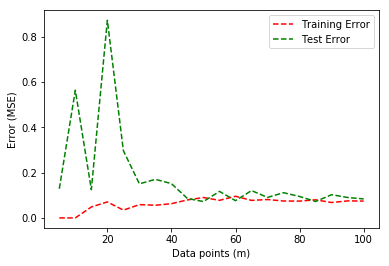

In [47]:
plt.plot(m, train_error, 'r--', label = 'Training Error')
plt.plot(m, test_error, 'g--', label = "Test Error")
plt.legend()
plt.xlabel('Data points (m)')
plt.ylabel('Error (MSE)')
print('Training and Testing Error vs. Data points (m) built on model')